# Курсовая работа Гладышев В.В.

## Подготовка данных

### Получение данных

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vitalygladyshev","key":"2bbb481c72ed617b4a8a26ea850c3ec9"}'}

In [5]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Dec 26 18:52 .
drwx------ 1 root root 4096 Dec 26 18:04 ..
-rw------- 1 root root   71 Dec 26 18:52 kaggle.json


In [6]:
!kaggle datasets list -s gesture

ref                                                     title                                                size  lastUpdated          downloadCount  
------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
gti-upm/leapgestrecog                                   Hand Gesture Recognition Database                     2GB  2018-07-30 06:43:29          10189  
kyr7plus/emg-4                                          Classify gestures by reading muscle activity.       868KB  2018-12-09 17:45:37           2535  
datamunge/sign-language-mnist                           Sign Language MNIST                                  63MB  2017-10-20 15:09:18          34848  
shayanriyaz/gesture-recognition                         Gesture Recognition                                   2MB  2020-02-25 18:12:57             74  
corrphilip/numeral-gestures                             Numeral Gestures recorded on iOS

In [7]:
!kaggle datasets download -d gti-upm/leapgestrecog 
!ls

leapgestrecog.zip: Skipping, found more recently modified local copy (use --force to force download)
data  leapgestrecog  leapGestRecog  leapgestrecog.zip  net  sample_data


In [8]:
from zipfile import ZipFile

In [9]:
zip_file = ZipFile('leapgestrecog.zip')
zip_file.extractall()   # "./lyft-udacity-challenge")

In [10]:
!ls

data  leapgestrecog  leapGestRecog  leapgestrecog.zip  net  sample_data


In [11]:
path = "./leapGestRecog"

### Предобработка данных

In [12]:
import os

In [13]:
class_names = {}
file_counter = {}
file_img = {}

for root, dirs, files in os.walk(path):
    if dirs:
        if len(dirs[2]) > 3 and dirs[2][2] == '_':
            for dir in dirs:
                class_names[int(dir[:2])-1] = dir[3:]
                file_counter[int(dir[:2])-1] = 0
                file_img[int(dir[:2])-1] = []
            break

class_names

{0: 'palm',
 1: 'l',
 2: 'fist',
 3: 'fist_moved',
 4: 'thumb',
 5: 'index',
 6: 'ok',
 7: 'palm_moved',
 8: 'c',
 9: 'down'}

In [14]:
file_counter

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [15]:
file_img

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [16]:
for root, dirs, files in os.walk(path):
    for fl in files:
        file_counter[int(fl[9:11])-1] += 1
        f = os.path.join(root, fl)
        file_img[int(fl[9:11])-1].append(f)
file_counter

{0: 2000,
 1: 2000,
 2: 2000,
 3: 2000,
 4: 2000,
 5: 2000,
 6: 2000,
 7: 2000,
 8: 2000,
 9: 2000}

In [17]:
file_img[0][0]

'./leapGestRecog/05/01_palm/frame_05_01_0130.png'

In [18]:
file_img[0][:5], file_img[0][-5:]

(['./leapGestRecog/05/01_palm/frame_05_01_0130.png',
  './leapGestRecog/05/01_palm/frame_05_01_0087.png',
  './leapGestRecog/05/01_palm/frame_05_01_0185.png',
  './leapGestRecog/05/01_palm/frame_05_01_0116.png',
  './leapGestRecog/05/01_palm/frame_05_01_0049.png'],
 ['./leapGestRecog/08/01_palm/frame_08_01_0057.png',
  './leapGestRecog/08/01_palm/frame_08_01_0176.png',
  './leapGestRecog/08/01_palm/frame_08_01_0019.png',
  './leapGestRecog/08/01_palm/frame_08_01_0156.png',
  './leapGestRecog/08/01_palm/frame_08_01_0126.png'])

In [19]:
!cp ./leapGestRecog/06/01_palm/frame_06_01_0195.png data/

In [20]:
pip install mediapipe

In [21]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# import scipy.misc

import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
# For webcam input:
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5)

(240, 640)


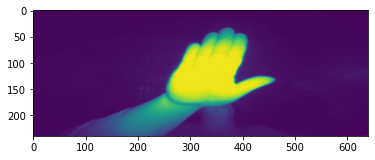

In [22]:
img = Image.open(file_img[0][0])
print(np.asarray(img).shape)
plt.imshow(img)

In [23]:
src = np.asarray(img)

In [24]:
frame = cv2.cvtColor(src, cv2.COLOR_GRAY2RGB)

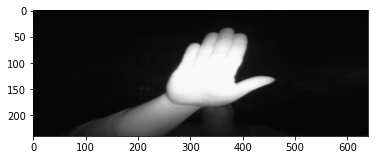

In [25]:
plt.imshow(frame)

In [26]:
arm_marks = ['WRIST',
             'THUMB_CMC', 'THUMB_MCP', 'THUMB_IP', 'THUMB_TIP',
             'INDEX_FINGER_MCP', 'INDEX_FINGER_PIP', 'INDEX_FINGER_DIP', 'INDEX_FINGER_TIP',
             'MIDDLE_FINGER_MCP', 'MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP',
             'RING_FINGER_MCP', 'RING_FINGER_PIP', 'RING_FINGER_DIP', 'RING_FINGER_TIP',
             'PINKY_MCP', 'PINKY_PIP', 'PINKY_DIP', 'PINKY_TIP']

In [27]:
def hand_detection_mp(file_pth, prn=False):
    img = np.asarray(Image.open(file_pth))
    h, w = img.shape
    frame = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)   # cv2.flip(frame, 1)

    frame.flags.writeable = False
    # im_pil = Image.fromarray(frame)
    results = hands.process(frame)
    frame.flags.writeable = True

    if results.multi_hand_landmarks and prn:
        count = 0
        for hand_landmarks in results.multi_hand_landmarks:
            count += 1
            print(f"Рука {count}")
            print(
                f'\tIndex finger tip coordinates: ('
                f'x: {round(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * w)}, '
                f'y: {round(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * h)})'
            )
            for num, mark in enumerate(hand_landmarks.landmark):
                print(f"\tМетка {arm_marks[num]}"
                        f"- x: {round(mark.x * w)}, y: {round(mark.y * h)}")

    return results, frame

In [28]:
hand_detect_rez, frame = hand_detection_mp(file_img[0][0], True)

Рука 1
	Index finger tip coordinates: (x: 398, y: 60)
	Метка WRIST- x: 302, y: 157
	Метка THUMB_CMC- x: 352, y: 167
	Метка THUMB_MCP- x: 392, y: 158
	Метка THUMB_IP- x: 425, y: 144
	Метка THUMB_TIP- x: 452, y: 130
	Метка INDEX_FINGER_MCP- x: 376, y: 102
	Метка INDEX_FINGER_PIP- x: 394, y: 65
	Метка INDEX_FINGER_DIP- x: 398, y: 59
	Метка INDEX_FINGER_TIP- x: 398, y: 60
	Метка MIDDLE_FINGER_MCP- x: 353, y: 95
	Метка MIDDLE_FINGER_PIP- x: 368, y: 56
	Метка MIDDLE_FINGER_DIP- x: 372, y: 50
	Метка MIDDLE_FINGER_TIP- x: 371, y: 52
	Метка RING_FINGER_MCP- x: 327, y: 94
	Метка RING_FINGER_PIP- x: 340, y: 61
	Метка RING_FINGER_DIP- x: 343, y: 57
	Метка RING_FINGER_TIP- x: 343, y: 59
	Метка PINKY_MCP- x: 302, y: 100
	Метка PINKY_PIP- x: 304, y: 76
	Метка PINKY_DIP- x: 305, y: 71
	Метка PINKY_TIP- x: 305, y: 74


In [29]:
# Функция рисования прямоугольников рук
def draw_hand(frame, hand_landmarks):
    h, w, _ = frame.shape
    mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    max_x = max_y = 0
    min_x = min_y = 65535
    for mark in hand_landmarks.landmark:
        if mark.x > max_x:
            max_x = mark.x
        if mark.x < min_x:
            min_x = mark.x
        if mark.y > max_y:
            max_y = mark.y
        if mark.y < min_y:
            min_y = mark.y
    max_x = round(max_x * w) + 30
    min_x = round(min_x * w) - 30
    max_y = round(max_y * h) + 30
    min_y = round(min_y * h) - 30
    if min_x < 0:
        min_x = 0
    if min_y < 0:
        min_y = 0
    if max_x > w:
        max_x = w
    if max_y > h:
        max_y = h
    print(f"\tmax_x: {max_x} min_x: {min_x} max_y: {max_y} min_y: {min_y}")
    # Рисуем обрамляющий прямоугольник руки на кадре
    cv2.rectangle(frame,
                    (min_x, min_y),
                    (max_x, max_y),
                    (0, 255, 0),
                    thickness=2)
    return frame, [min_x, min_y, max_x, max_y]

	max_x: 482 min_x: 272 max_y: 197 min_y: 20


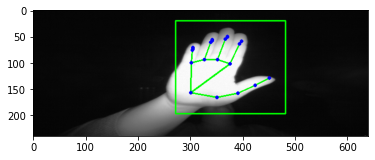

In [30]:
if hand_detect_rez.multi_hand_landmarks:
    for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
        img, hand_box = draw_hand(frame, hand_landmarks)
        plt.imshow(img)
        break

In [31]:
# Возвращает изображение ладони
def get_hand(frame, hand_landmarks):
    h, w, _ = frame.shape
    max_x = max_y = 0
    min_x = min_y = 65535
    for mark in hand_landmarks.landmark:
        if mark.x > max_x:
            max_x = mark.x
        if mark.x < min_x:
            min_x = mark.x
        if mark.y > max_y:
            max_y = mark.y
        if mark.y < min_y:
            min_y = mark.y
    
    max_x = round(max_x * w) + 30
    min_x = round(min_x * w) - 30
    max_y = round(max_y * h) + 30
    min_y = round(min_y * h) - 30
    
    if min_x < 0:
        min_x = 0
    if min_y < 0:
        min_y = 0
    if max_x > w:
        max_x = w
    if max_y > h:
        max_y = h

    # print(f"\tmax_x: {max_x} min_x: {min_x} max_y: {max_y} min_y: {min_y}")
    
    res = frame[int(min_y):int(max_y), int(min_x):int(max_x)]
    res = cv2.resize(res, (160, 160), interpolation = cv2.INTER_AREA)
    return res

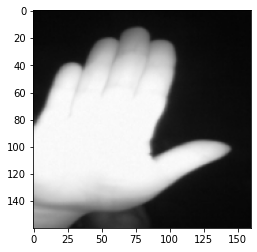

In [32]:
hand_detect_rez, frame = hand_detection_mp(file_img[0][0])

if hand_detect_rez.multi_hand_landmarks:
    for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
        img = get_hand(frame, hand_landmarks)
        plt.imshow(img)
        break

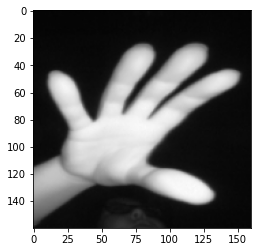

In [33]:
hand_detect_rez, frame = hand_detection_mp(file_img[9][0])

if hand_detect_rez.multi_hand_landmarks:
    for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
        img = get_hand(frame, hand_landmarks)
        plt.imshow(img)
        break

## Формирование датасета

In [34]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [35]:
!ls -la 

total 2233096
drwxr-xr-x  1 root root       4096 Dec 26 18:52 .
drwxr-xr-x  1 root root       4096 Dec 26 17:40 ..
drwxr-xr-x  1 root root       4096 Dec 21 17:29 .config
drwxr-xr-x  2 root root     565248 Dec 26 18:02 data
drwxr-xr-x  3 root root       4096 Dec 26 17:57 leapgestrecog
drwxr-xr-x 12 root root       4096 Dec 26 17:57 leapGestRecog
-rw-r--r--  1 root root 2286085038 Dec 26 17:56 leapgestrecog.zip
drwxr-xr-x  2 root root       4096 Dec 26 18:41 net
drwxr-xr-x  1 root root       4096 Dec 21 17:29 sample_data


In [36]:
data_path = "data/"

In [37]:
for cn in range(10):
    file_counter[cn] = 0
file_counter

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [38]:
pip install progressbar2

In [39]:
import tqdm

In [40]:
for img in file_img[0]:
    print(img)
    print(data_path + img[-20:])   # + img[16:19]
    break

./leapGestRecog/05/01_palm/frame_05_01_0130.png
data/frame_05_01_0130.png


In [41]:
for cn in range(10):
    have_cn_inmg = False
    for img in file_img[cn]:
        hand_detect_rez, frame = hand_detection_mp(img)
        if hand_detect_rez.multi_hand_landmarks:
            for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
                image = get_hand(frame, hand_landmarks)
                path = data_path + img[-20:]   # + img[16:19]
                cv2.imwrite(path, image)
                file_counter[cn] += 1
                print(path)
                break
        break
    break

data/frame_05_01_0130.png


In [42]:
images_data = []
labels = []
images_for_vis = []

pbar = tqdm.tqdm(total=20000)
for cn in range(10):
    have_cn_inmg = False
    for img in file_img[cn]:
        hand_detect_rez, frame = hand_detection_mp(img)
        if hand_detect_rez.multi_hand_landmarks:
            for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
                image = get_hand(frame, hand_landmarks)
                path = data_path + img[-20:]   # + img[16:19]
                cv2.imwrite(path, image)
                file_counter[cn] += 1
                images_data.append(path)
                labels.append(cn)
                if not have_cn_inmg:
                    images_for_vis.append(path)
                    have_cn_inmg = True
                break
        pbar.update(1)
pbar.close()
file_counter

100%|██████████| 20000/20000 [04:35<00:00, 72.67it/s]


{0: 1973,
 1: 1135,
 2: 1201,
 3: 1182,
 4: 1248,
 5: 1062,
 6: 1841,
 7: 801,
 8: 996,
 9: 1797}

In [43]:
len(images_data), len(labels)

(13235, 13235)

In [44]:
images_for_vis

['data/frame_05_01_0130.png',
 'data/frame_05_02_0127.png',
 'data/frame_05_03_0028.png',
 'data/frame_05_04_0049.png',
 'data/frame_05_05_0079.png',
 'data/frame_05_06_0129.png',
 'data/frame_05_07_0053.png',
 'data/frame_05_08_0120.png',
 'data/frame_05_09_0101.png',
 'data/frame_05_10_0094.png']

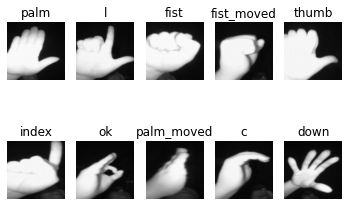

In [45]:
# plt.figure(figsize=(10,10))
for ind in range(10):
    ax = plt.subplot(2,5,ind+1)

    img = Image.open(images_for_vis[ind])
    # hand_detect_rez, frame = hand_detection_mp(images_for_vis[ind])
    # if hand_detect_rez.multi_hand_landmarks:
    #     for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
    #         img = get_hand(frame, hand_landmarks)
    #         break

    plt.imshow(img)
    plt.title(class_names[ind])
    plt.axis('off')

In [46]:
labels[0], labels[-1]

(0, 9)

In [47]:
import pandas as pd

In [48]:
data = pd.DataFrame({'images': images_data, 'labels': labels})
data.reset_index(drop=True, inplace=True)
data.head()

,images,labels
0,data/frame_05_01_0130.png,0
1,data/frame_05_01_0087.png,0
2,data/frame_05_01_0185.png,0
3,data/frame_05_01_0116.png,0
4,data/frame_05_01_0049.png,0


In [49]:
data.tail()

,images,labels
13230,data/frame_08_10_0080.png,9
13231,data/frame_08_10_0194.png,9
13232,data/frame_08_10_0054.png,9
13233,data/frame_08_10_0108.png,9
13234,data/frame_08_10_0038.png,9


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13235 entries, 0 to 13234
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  13235 non-null  object
 1   labels  13235 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 206.9+ KB


In [51]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.nn import functional as F

In [52]:
class CustomDatasetFromImages(Dataset):
    def __init__(self, data_info):
        # Подаем наш подготовленный датафрейм
        self.data_info = data_info
        
        self.image_arr = self.data_info.iloc[:,0]
        self.label_arr = self.data_info.iloc[:,1]
        
        # Количество пар картинка-сегментация
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Читаем картинку
        img = np.asarray(Image.open(self.image_arr[index]))

        # hand_detect_rez, frame = hand_detection_mp(self.image_arr[index])
        # if hand_detect_rez.multi_hand_landmarks:
        #     for hand_landmarks in hand_detect_rez.multi_hand_landmarks:
        #         img = get_hand(frame, hand_landmarks)
        #         break

        # размер 160х160
        # Нормализуем изображение в значениях [0, 1]
        img = torch.from_numpy(img)/255   # img = torch.FloatTensor(img)
        
        img = img[:, :, 0]
        img = img.unsqueeze(0)  #.permute(2, 0, 1)   # img = img.unsqueeze(0).permute(0,3,1,2)
               
        return (img, self.label_arr[index])

    def __len__(self):
        return self.data_len

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# 80 % в тренировочную выборку, 20 - в валидационную
X_train, X_valid = train_test_split(data, test_size=0.2)

# Упорядочиваем индексацию
X_train.reset_index(drop=True, inplace=True)
X_valid.reset_index(drop=True, inplace=True)

# Оборачиваем каждую выборку в наш кастомный датасет
train_data = CustomDatasetFromImages(X_train)   # [:300])
valid_data = CustomDatasetFromImages(X_valid)   # [:300])

In [55]:
batch_s = 64

train_data_loader = DataLoader(train_data, batch_size=batch_s, shuffle=True)
valid_data_loader = DataLoader(valid_data, batch_size=batch_s, shuffle=True)

In [56]:
data_iter = iter(valid_data_loader)
# [data_iter.next() for i in range(5)]

images, labels = data_iter.next()

images.shape, labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)


(torch.Size([64, 1, 160, 160]),
 tensor([1, 9, 8, 5, 4, 1, 2, 4, 1, 8, 5, 4, 2, 2, 5, 4, 1, 2, 1, 9, 8, 5, 5, 6,
         0, 0, 8, 0, 0, 9, 7, 0, 9, 4, 9, 6, 9, 9, 7, 1, 0, 6, 9, 9, 2, 2, 4, 0,
         8, 9, 4, 0, 9, 0, 4, 9, 5, 6, 4, 9, 6, 9, 9, 1]))

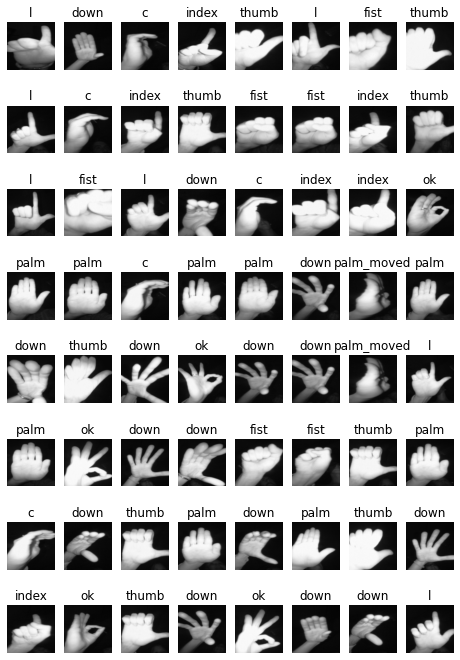

In [57]:
plt.figure(figsize=(8,12))
for ind in range(batch_s):
    ax = plt.subplot(8,8,ind+1)
    
    plt.imshow(cv2.cvtColor(images[ind, 0, :, :].numpy(), cv2.COLOR_GRAY2RGB))
    plt.title(class_names[int(labels[ind])])
    plt.axis('off')

## Базовая модель

In [58]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [59]:
class HPSearchNET(nn.Module):
    
    def __init__(self, 
                 cnn_num=3, 
                 fc_num=3, 
                 cnn_filt_num=16, 
                 kern_size=3, 
                 func_act='relu', 
                 in_shape=160,
                #  batch=64, 
                 nn_prn=False):
        super(HPSearchNET, self).__init__()

        self.in_size = 1
        self.cnn_num = cnn_num
        self.fc_num = fc_num
        self.cnn_filt_num = cnn_filt_num
        self.kern_size = kern_size
        self.func_act = func_act
        self.fs_size = 0
        self.in_shape = in_shape
        # self.batch = batch
        self.nn_prn = nn_prn
        
        if kern_size == 3:
            padd = (1, 1)
        if kern_size == 5:
            padd = (2, 2)
        
        if func_act == 'relu':
            self.str_f_act = nn.ReLU()
        else:
            self.str_f_act = nn.ELU()
        self.sftmx = nn.Softmax(dim = 1)

        self.conv1 = nn.Conv2d(self.in_size, 
                               self.cnn_filt_num, 
                               kernel_size=self.kern_size, 
                               stride=1, 
                               padding=padd)
        self.pool = nn.MaxPool2d(2, 2)
        if self.cnn_num > 1:
            self.conv2 = nn.Conv2d(self.cnn_filt_num, 
                                   self.cnn_filt_num*2, 
                                   kernel_size=self.kern_size, 
                                   stride=1, 
                                   padding=padd)
            self.cnn_filt_num *= 2
            if self.cnn_num > 2:
                self.conv3 = nn.Conv2d(self.cnn_filt_num, 
                                       self.cnn_filt_num*2, 
                                       kernel_size=self.kern_size, 
                                       stride=1, 
                                       padding=padd)
                self.cnn_filt_num *= 2
        
        self.fs_size = self.cnn_filt_num * (self.in_shape//2**self.cnn_num) ** 2
        fs_sz = self.fs_size
        
        if self.fc_num > 2:
            self.fc_dec2 = nn.Linear(fs_sz, fs_sz//4)   # fs_sz*3//4
            fs_sz=fs_sz//4   #*3//4
        if self.fc_num > 1:
            self.fc_dec1 = nn.Linear(fs_sz, fs_sz//4)   # fs_sz*3//4
            fs_sz=fs_sz//4   # *3//4
        self.fc_out = nn.Linear(fs_sz, 10)

    def forward(self, x):
        if self.nn_prn:
            print("\n\tX размеры income: %s" % (x.shape,))
        x = self.pool(self.str_f_act(self.conv1(x)))
        if self.nn_prn:
            print("\tX размеры conv1, pool: %s" % (x.shape,))
        if self.cnn_num > 1:
            x = self.pool(self.str_f_act(self.conv2(x)))
            if self.nn_prn:
                print("\tX размеры conv2, pool: %s" % (x.shape,))
            if self.cnn_num > 2:
                x = self.pool(self.str_f_act(self.conv3(x)))
                if self.nn_prn:
                    print("\tX размеры conv3, pool: %s" % (x.shape,))
        x = x.view(-1, self.fs_size)
        if self.nn_prn:
            print("\tX размеры x.view: %s" % (x.shape,))
        if self.fc_num > 2:
            x = self.str_f_act(self.fc_dec2(x))
            if self.nn_prn:
                print("\tX размеры fc_dec2: %s" % (x.shape,))
        if self.fc_num > 1:
            x = self.str_f_act(self.fc_dec1(x))
            if self.nn_prn:
                print("\tX размеры fc_dec1: %s" % (x.shape,))
        x = self.sftmx(self.fc_out(x))
        if self.nn_prn:
            print("\tX размеры fc_out: %s\n" % (x.shape,))
            self.nn_prn = False
        return x

In [75]:
model = HPSearchNET(nn_prn=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [76]:
epochs = 10

In [77]:
path_checkpoint = "checkpoints"
if not os.path.exists(path_checkpoint):
    os.mkdir(path_checkpoint)

In [78]:
import time

In [79]:
epoch_losses = []
epoch_val_losses = []

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    cum_loss = []

    print(f'Epoch: {epoch+1}')
    time1 = time.time()
    model.train()
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device) # .cuda()
        labels = labels.to(device) # .cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        cum_loss.append(loss.item())
        bundle = 20
        if not (i+1) % bundle:    # print every 10 mini-batches
            print(f'\tbatchcount: {i+1}, size: {batch_s*bundle} '
                  f'total: {(i+1)*batch_s} '
                  f'loss: {running_loss/(batch_s*bundle):.5f}')
            running_loss = 0.0

    time2 = time.time()
    epoch_losses.append(np.mean(cum_loss))
    torch.save(model.state_dict(), path_checkpoint + f"/checkpoint_ep_{epoch}.pth")

    cum_loss = []
    model.eval()
    with torch.no_grad():
        running_val_loss = 0.0
        for i, data in enumerate(valid_data_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device) # .cuda()
            labels = labels.to(device) # .cuda()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()
            cum_loss.append(loss.item())

    epoch_val_losses.append(np.mean(cum_loss))
    print(f'\n  Epoch {epoch+1}, loss: {epoch_losses[-1]:.5f} loss_val: {epoch_val_losses[-1]:.5f} time = {time2-time1:.2f} sec\n')

Epoch: 1
X размеры income: torch.Size([64, 1, 160, 160])

X размеры conv1, pool: torch.Size([64, 16, 80, 80])

X размеры conv2, pool: torch.Size([64, 32, 40, 40])

X размеры conv3, pool: torch.Size([64, 64, 20, 20])

X размеры x.view: torch.Size([64, 25600])

X размеры fc_dec2: torch.Size([64, 6400])

X размеры fc_dec1: torch.Size([64, 1600])

X размеры fc_out: torch.Size([64, 10])

	batchcount: 20, size: 1280 total: 1280 loss: 0.03597
	batchcount: 40, size: 1280 total: 2560 loss: 0.03596
	batchcount: 60, size: 1280 total: 3840 loss: 0.03595
	batchcount: 80, size: 1280 total: 5120 loss: 0.03593
	batchcount: 100, size: 1280 total: 6400 loss: 0.03592
	batchcount: 120, size: 1280 total: 7680 loss: 0.03589
	batchcount: 140, size: 1280 total: 8960 loss: 0.03580
	batchcount: 160, size: 1280 total: 10240 loss: 0.03559

  Epoch 1, loss: 2.29450 loss_val: 2.26584 time = 25.37 sec

Epoch: 2
	batchcount: 20, size: 1280 total: 1280 loss: 0.03512
	batchcount: 40, size: 1280 total: 2560 loss: 0.0339

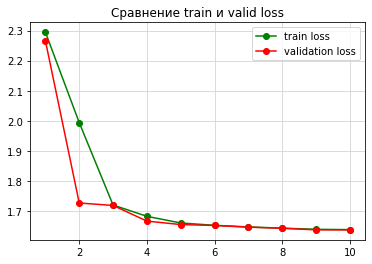

In [80]:
plt.plot(np.arange(1, epochs+1), epoch_losses, 'go-', label='train loss')
plt.plot(np.arange(1, epochs+1), epoch_val_losses, 'ro-', label='validation loss')

plt.legend(loc="upper right")
plt.grid(color="lightgrey")
plt.title('Сравнение train и valid loss' )
plt.show()

## Подбор гперпараметров

In [60]:
from typing import List, Tuple

In [61]:
class HyperParSearch:
    
    def __init__(self):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.net = None
        self.summary_data = pd.DataFrame(data=[[0, 0, 0, 0, 0, 0]], 
                            columns=['func', 'cnn_num', 'fc_num', 'kern_size', 'loss', 'accuracy'])
        self.cnn_num = [2, 3]
        self.fc_num = [2, 3]
        self.kern_size = [3, 5]
        self.func_act = ['relu', 'elu']
        self.epochs = 5
        self.in_shape = 160

    def net_sample(self):
        if self.net == None:
            return 0
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(self.net.parameters(), 
                                    lr=0.01, 
                                    momentum=0.9)   # lr=0.001
        ep_loss_list = []
        ep_acc_list = []
        for epoch in range(self.epochs):
            total_loss = 0
            loss_list = []
            acc_list = []
            running_loss = 0.0
            
            for i, data in enumerate(train_data_loader, 0):
                inputs, labels = data
                inputs, labels = inputs.to(self.device), labels.to(self.device)

                # обнуляем градиент
                optimizer.zero_grad()

                outputs = self.net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # print statistics
                running_loss += loss.item()
                bundle = 20
                if not (i+1) % bundle:    # print every 10 mini-batches
                    print(f'\t\t\tbatchcount: {i+1}, size: {batch_s*bundle} '
                          f'total: {(i+1)*batch_s} '
                          f'loss: {running_loss/(batch_s*bundle):.5f}')
                    running_loss = 0.0

                # выводим статистику о процессе обучения
                loss_list.append(loss.item())

                # Отслеживание точности
                total = labels.size(0)
                _, predicted = torch.max(outputs.data, 1)
                correct = (predicted == labels).sum().item()
                acc_list.append(correct / total)
                
            ep_loss_list.append(sum(loss_list) / len(loss_list))
            ep_acc_list.append(sum(acc_list) / len(acc_list))
            print(f"\t\tЭпоха: {epoch+1}\tloss: {ep_loss_list[-1]:.6f}\taccuracy: {ep_acc_list[-1]*100:.3f}%")
        return ep_loss_list, ep_acc_list
        
    def grid_search(self):
        cnt = 0
        
        path_dir = './net'
        if not os.path.exists(path_dir):
            os.mkdir(path_dir)
        
        for f_a in self.func_act:
            for c_n in self.cnn_num:
                for f_n in self.fc_num:
                    for k_s in self.kern_size:
                        loss_m = []
                        acc_m = []
                        print(f"Модель: функция активации: {f_a}, cnn слоёв: {c_n}, fc слоёв: {f_n}, kernel: {k_s}\n")
                        self.net = HPSearchNET(cnn_num=c_n, 
                                               fc_num=f_n, 
                                               kern_size=k_s, 
                                               func_act=f_a, 
                                               nn_prn=True,
                                               in_shape=self.in_shape).to(self.device)
                        print("\tМодель state_dict: ")
                        for param in self.net.state_dict():
                            print("\t\t", param,": ", self.net.state_dict()[param].size())

                        loss_t, acc_t = self.net_sample()
                        torch.save(self.net.state_dict(), f'./net/cifar_net_{f_a}_cnn{c_n}_fc{f_n}_kr{k_s}.pth')

                        print(f"\tОшибки на train: {loss_t[-1]:.5f}")
                        print(f"\tAccuracy на train: {acc_t[-1]:.5f}\n")
                        self.summary_data.loc[cnt, ['func', 'cnn_num', 'fc_num', 
                                               'kern_size', 'loss', 
                                               'accuracy']] = [f_a, c_n, 
                                                f_n, k_s, loss_t[-1], acc_t[-1]]
                        cnt += 1

In [62]:
search_top = HyperParSearch()

In [63]:
search_top.grid_search()

Модель: функция активации: relu, cnn слоёв: 2, fc слоёв: 2, kernel: 3

	Модель state_dict: 
		 conv1.weight :  torch.Size([16, 1, 3, 3])
		 conv1.bias :  torch.Size([16])
		 conv2.weight :  torch.Size([32, 16, 3, 3])
		 conv2.bias :  torch.Size([32])
		 fc_dec1.weight :  torch.Size([12800, 51200])
		 fc_dec1.bias :  torch.Size([12800])
		 fc_out.weight :  torch.Size([10, 12800])
		 fc_out.bias :  torch.Size([10])

	X размеры income: torch.Size([64, 1, 160, 160])
	X размеры conv1, pool: torch.Size([64, 16, 80, 80])
	X размеры conv2, pool: torch.Size([64, 32, 40, 40])
	X размеры x.view: torch.Size([64, 51200])
	X размеры fc_dec1: torch.Size([64, 12800])
	X размеры fc_out: torch.Size([64, 10])

			batchcount: 20, size: 1280 total: 1280 loss: 0.03593
			batchcount: 40, size: 1280 total: 2560 loss: 0.03573
			batchcount: 60, size: 1280 total: 3840 loss: 0.03508
			batchcount: 80, size: 1280 total: 5120 loss: 0.03322
			batchcount: 100, size: 1280 total: 6400 loss: 0.03225
			batchcount: 120

In [64]:
search_top.summary_data

,func,cnn_num,fc_num,kern_size,loss,accuracy
0,relu,2.0,2.0,3.0,1.639956,0.820823
1,relu,2.0,2.0,5.0,1.657603,0.802939
2,relu,2.0,3.0,3.0,1.640657,0.820393
3,relu,2.0,3.0,5.0,1.649280,0.811303
4,relu,3.0,2.0,3.0,1.605061,0.855260
5,relu,3.0,2.0,5.0,1.565388,0.895587
6,relu,3.0,3.0,3.0,1.690461,0.772832
7,relu,3.0,3.0,5.0,1.658970,0.800707
8,elu,2.0,2.0,3.0,1.564712,0.897779
9,elu,2.0,2.0,5.0,1.637330,0.823405


In [65]:
search_top.summary_data.sort_values('accuracy', ascending=False)

,func,cnn_num,fc_num,kern_size,loss,accuracy
12,elu,3.0,2.0,3.0,1.485199,0.977948
13,elu,3.0,2.0,5.0,1.553869,0.907837
14,elu,3.0,3.0,3.0,1.561323,0.900454
8,elu,2.0,2.0,3.0,1.564712,0.897779
5,relu,3.0,2.0,5.0,1.565388,0.895587
4,relu,3.0,2.0,3.0,1.605061,0.855260
9,elu,2.0,2.0,5.0,1.637330,0.823405
10,elu,2.0,3.0,3.0,1.637761,0.822908
15,elu,3.0,3.0,5.0,1.639487,0.821025
0,relu,2.0,2.0,3.0,1.639956,0.820823


## Итоговое обучение

In [ ]:
# добавть шедулер